In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
data_dir = Path('C:/Users/sinjy/jupyter_notebook/datasets/kaggle_datasets/porto-seguro-safe-driver-prediction_dataset')
train = pd.read_csv(data_dir / "train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
rows = train.shape[0]
columns = train.shape[1]
print('The train dataset contains {0} rows and {1} columns'.format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## Data Quality checks

### Null or missing values check

In [4]:
train.isnull().any().any() # null data defined -1

False

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

<AxesSubplot:>

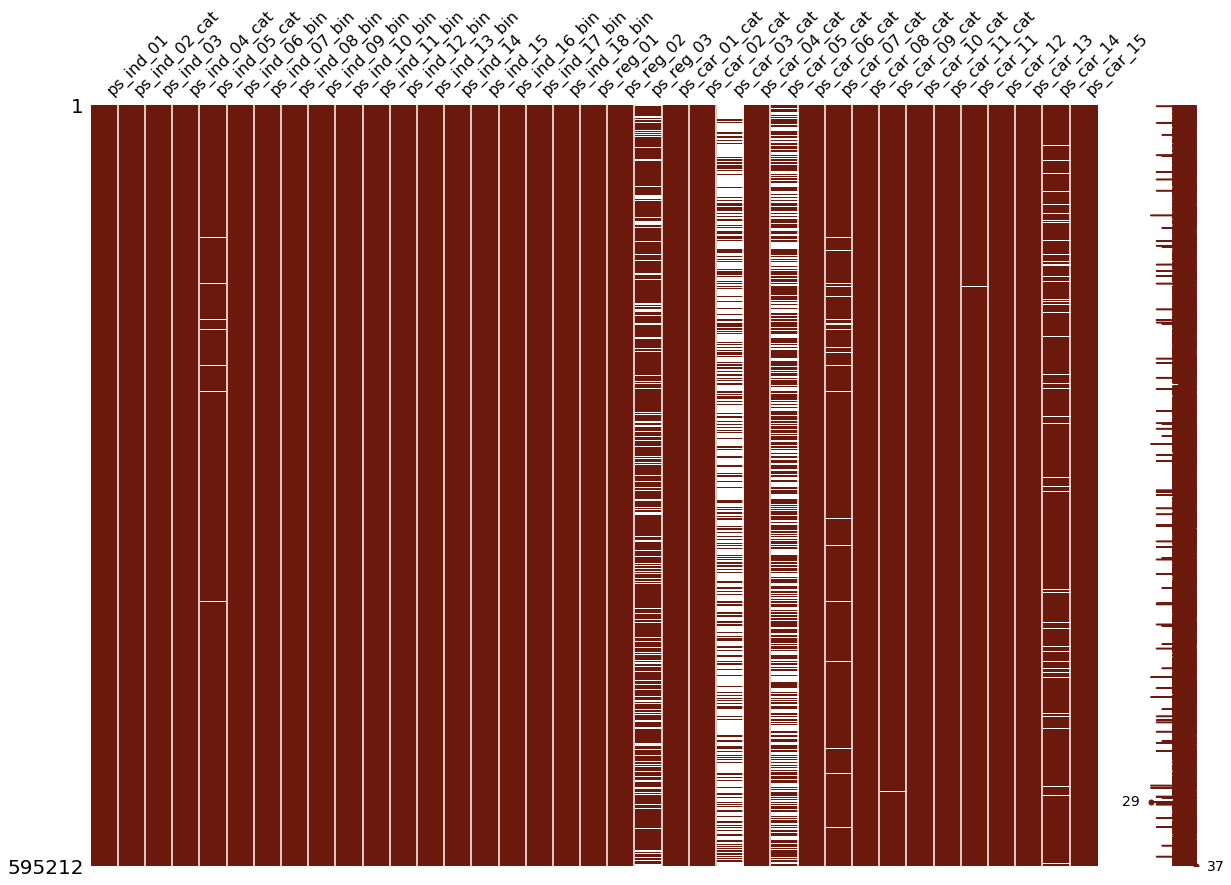

In [6]:
import missingno as msno
msno.matrix(df=train_copy.iloc[:, 2: 39], figsize=(20, 14), 
            color=(0.42, 0.1, 0.05))

### Target variable inspection

In [8]:
data = [go.Bar(
            x = train['target'].value_counts().index.values,
            y = train['target'].value_counts().values,
            text='Distribution of target variable'
)]
layout = go.Layout(
    title = 'Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

### Datatype check

In [9]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [10]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

## Correlation plots

### Correlation of float features

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

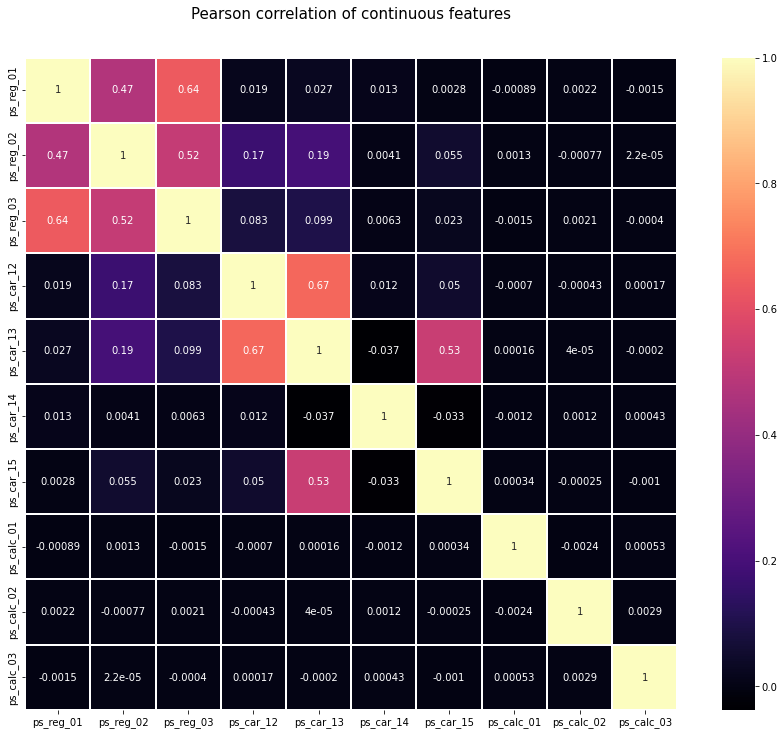

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True, 
           cmap=colormap, linecolor='white', annot=True)

### Correlation of integer features

In [12]:
data = [
    go.Heatmap(
        z = train_int.corr().values,
        x = train_int.columns.values,
        y = train_int.columns.values,
        colorscale = 'Viridis',
        reversescale = False,
#         text = True,
        opacity = 1.0
    )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900, height=700
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## Mutual Information plots

In [13]:
mf = mutual_info_classif(train_float.values, train.target.values, 
                        n_neighbors=3, random_state=17)
mf

array([0.01402035, 0.00431986, 0.0055185 , 0.00778454, 0.00157233,
       0.00197537, 0.01226   , 0.00553038, 0.00545101, 0.00562139])

## Binary features inspection

In [14]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [15]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Feature importance via Random Forest

In [17]:
train[train['ps_ind_02_cat'] == -1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
847,2210,0,5,-1,0,-1,-1,0,1,0,...,5,2,2,9,0,0,0,0,0,0
11840,29812,0,0,-1,8,0,0,0,0,0,...,6,1,3,9,0,0,1,1,0,0
13670,34370,0,5,-1,0,-1,-1,0,0,1,...,4,0,1,6,0,1,0,0,0,0
13804,34695,0,0,-1,0,-1,-1,1,0,0,...,5,2,1,4,0,1,0,0,1,0
14002,35176,0,0,-1,7,0,6,0,1,0,...,2,2,1,9,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583341,1458146,0,3,-1,5,0,0,0,0,1,...,9,2,0,5,0,1,1,0,0,0
584757,1461734,0,0,-1,7,1,0,0,0,0,...,4,0,4,5,0,0,1,0,0,0
587628,1468746,1,5,-1,0,-1,-1,0,0,1,...,7,1,6,6,0,0,1,0,1,0
591394,1478237,0,0,-1,6,1,0,0,0,1,...,8,3,4,9,0,1,0,0,0,0


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4,
                           max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values

### Plot.ly Scatter Plot of feature importances

In [26]:
trace = go.Scatter(
    y=rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=1,
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=features
)
data = [trace]

layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    xaxis=dict(
        ticklen=5,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title='Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen=5,
        gridwidth=2
    ),
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2010')

In [27]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                    reverse=False)))
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale='Viridis',
        reversescale=True
    ),
    name='Ranom Forest Feature importance',
    orientation='h'
)

layout=dict(
    title='Barplot of Feature importance',
    width=900, 
    height=2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    )
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

### Decision Tree visualisation

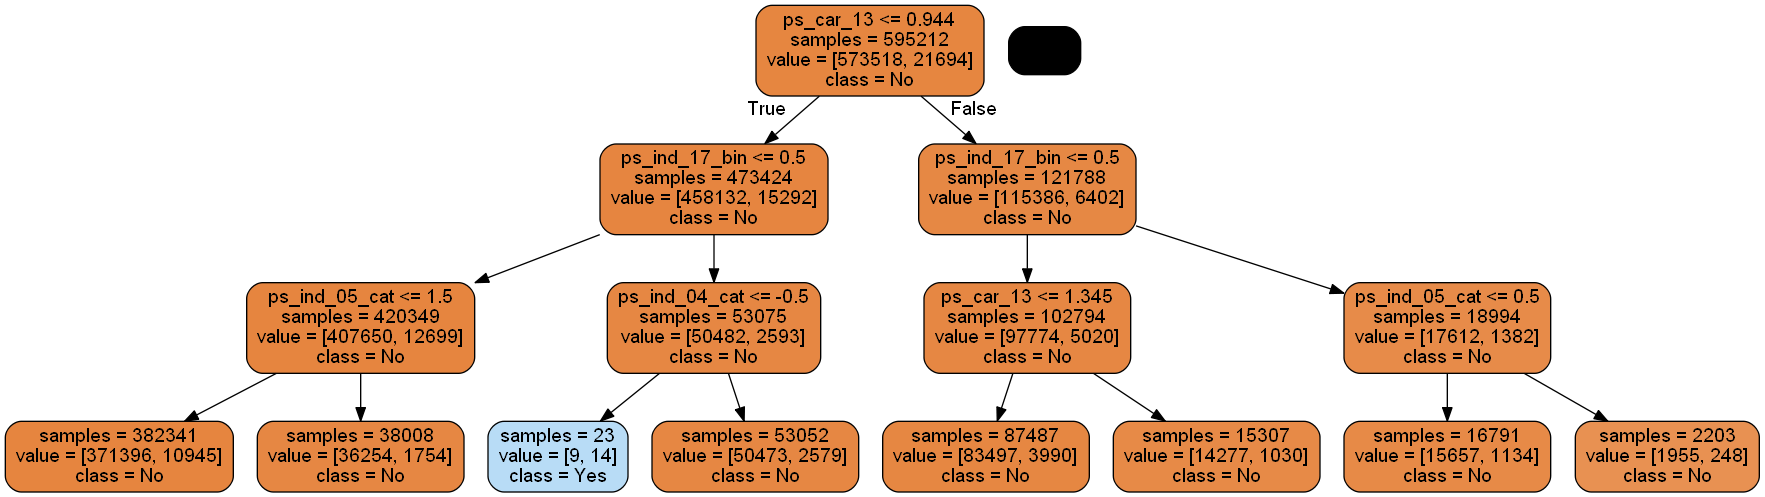

In [32]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(train.drop(['id', 'target'], axis=1), train.target)

model_dir = Path('C:/Users/sinjy/jupyter_notebook/model/kaggle')

with open(model_dir / 'tree1.dot', 'w') as f:
    f = tree.export_graphviz(decision_tree, 
                            out_file=f,
                            max_depth=4,
                            impurity=False,
                            feature_names=train.drop(['id', 'target'], axis=1).columns.values,
                            class_names=['No', 'Yes'],
                            rounded=True,
                            filled=True)
    
# check_call(['dot', '-Tpng', './tree1.dot', '-o', 'tree1.png'])
import pydot
(graph, ) = pydot.graph_from_dot_file(model_dir / 'tree1.dot')
graph.write_png(model_dir / 'tree1.png')

img = Image.open(model_dir / 'tree1.png')
draw = ImageDraw.Draw(img)
img.save(model_dir / 'sample-out.png')
PImage(model_dir / 'sample-out.png', )

## Feature importance via Gradient Boosting model

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values

In [35]:
trace = go.Scatter(
    y=gb.feature_importances_,
    x=features,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=1,
        size=13,
        color=gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=features
)
data=[trace]

layout = go.Layout(
    autosize=True,
    title='Gradient Boosting Machine Feature Importance',
    hovermode='closest',
    xaxis=dict(
        ticklen=5,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title='Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen=5,
        gridwidth=2
    ),
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2010')

In [36]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                    reverse=False)))
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale='Viridis',
        reversescale=True
    ),
    name='Gradient Boosting Classifier Feature importance',
    orientation='h'
)

layout = dict(
    title='Barplot of Feature importances',
    width=900,
    height=2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True
    )
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')